In [1]:
from sklearn import datasets

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
circles = datasets.make_circles()

In [7]:
print("features: {}".format(circles[0][:10]))
print("target: {}".format(circles[1][:10]))

features: [[ 0.6472136   0.4702282 ]
 [ 0.34062343 -0.72386164]
 [-0.05023242  0.79842138]
 [-0.06279052 -0.99802673]
 [-0.53582679  0.84432793]
 [ 0.30901699 -0.95105652]
 [-0.96858316 -0.24868989]
 [-0.63742399 -0.77051324]
 [ 0.05023242  0.79842138]
 [-0.74382119  0.29449964]]
target: [1 1 1 0 0 0 0 0 1 1]


In [9]:
from matplotlib.colors import ListedColormap

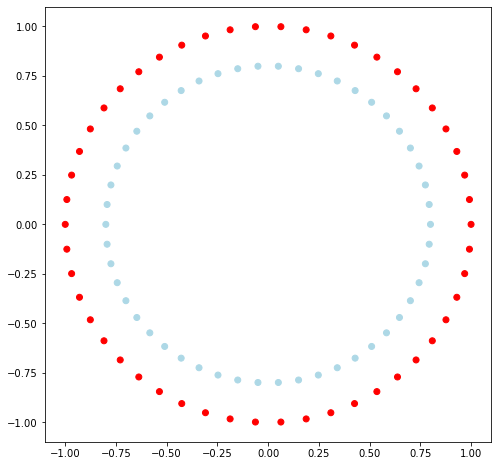

In [13]:
colors = ListedColormap(['red', 'lightblue'])

pyplot.figure(figsize(8, 8))
pyplot.scatter(list(map(lambda x: x[0], circles[0])), list(map(lambda x: x[1], circles[0])), c = circles[1], cmap = colors)

In [14]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c = data[1], cmap = colors)

In [21]:
noisy_circles = datasets.make_circles(noise = 0.04)

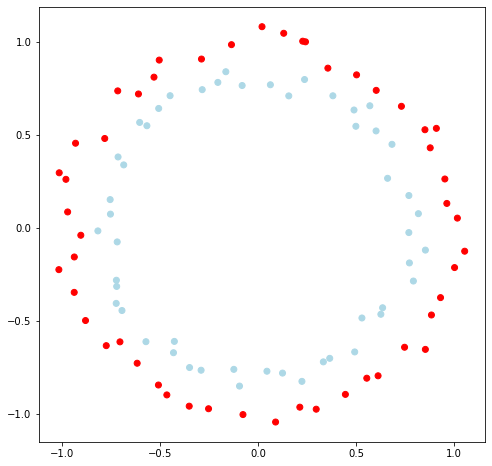

In [22]:
plot_2d_dataset(noisy_circles, colors)

In [23]:
iris = datasets.load_iris()

In [29]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
print("feature names: {}".format(iris.feature_names))
print("target names: {}".format(iris.target_names))

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


In [34]:
from pandas import DataFrame

In [39]:
df_iris = DataFrame(iris.data)
df_iris.columns = iris.feature_names
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
df_iris.target = df_iris.target.apply(lambda x : iris.target_names[x])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>]], dtype=object)

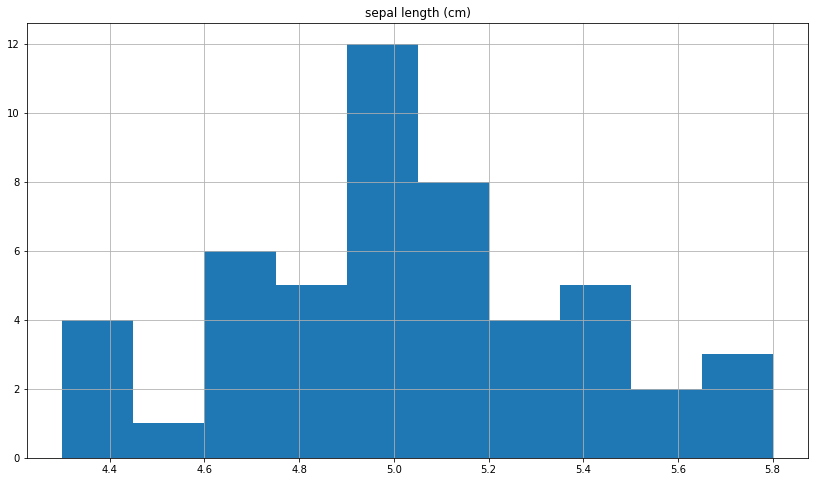

In [45]:
df_iris[df_iris.target == 'setosa'].hist('sepal length (cm)', figsize=(14, 8))

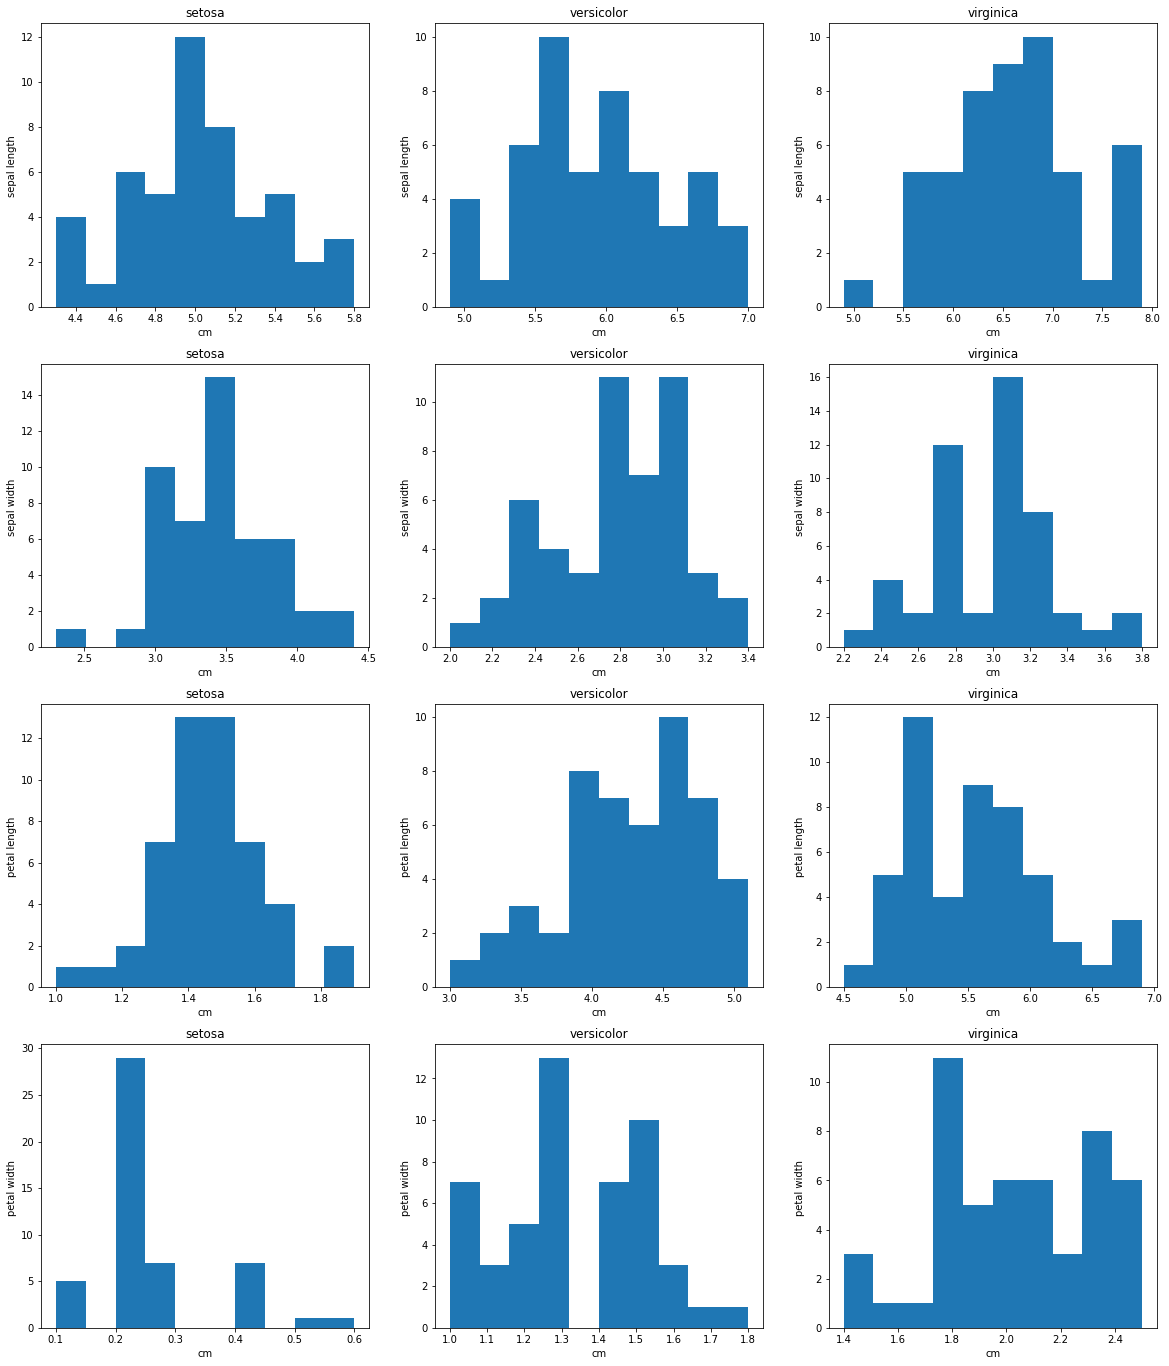

In [54]:
pyplot.figure(figsize(20, 24))

plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(df_iris[df_iris.target == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

In [55]:
import seaborn as sns

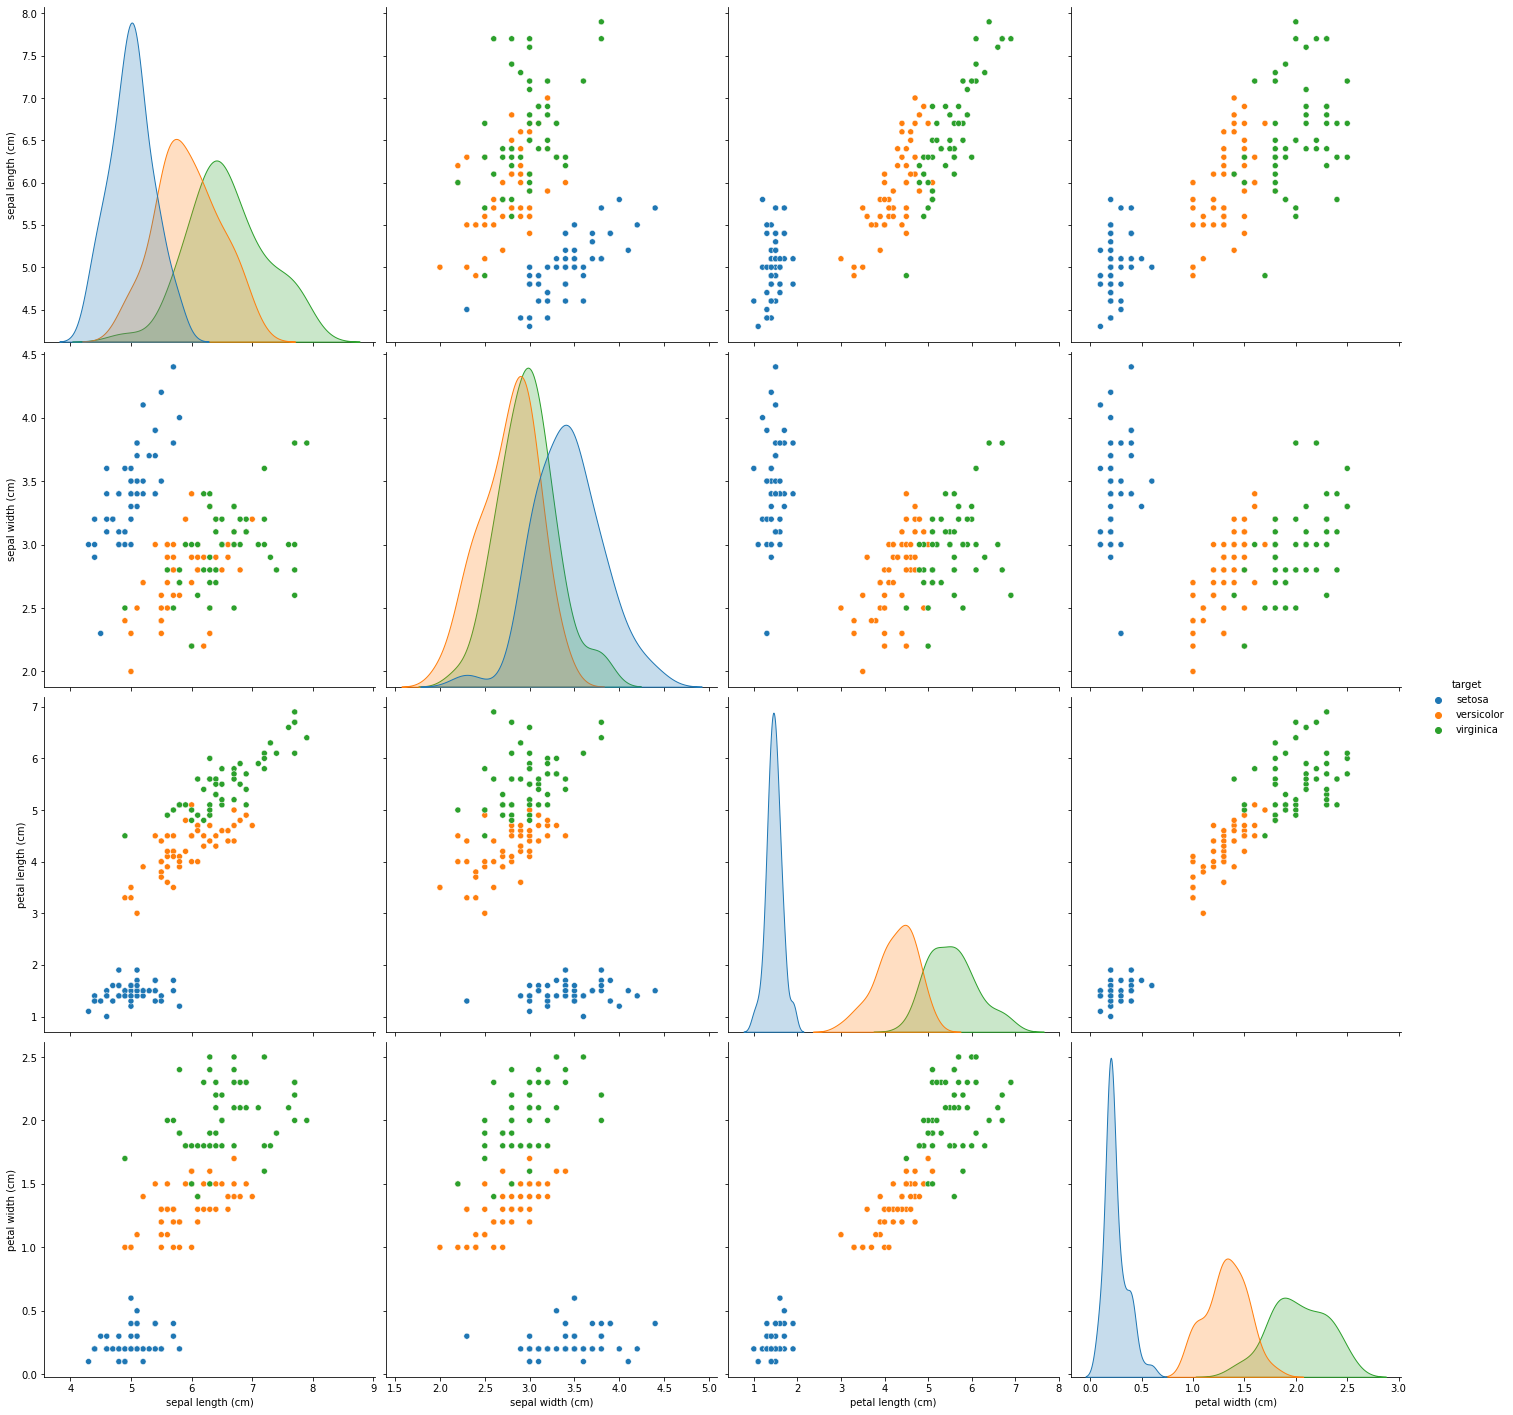

In [64]:
sns.pairplot(df_iris, hue = 'target', height=5)